Завдання. 
Потрібно побудувати модель SVM, Random Forest та інши. Вибрати найкращу. Зробити висновки.
Визначити оптимальну кількість кластерів методом ліктя та методом сілуєтів. Візуалізувати кластери методом середніх або будь-яким зручним методом.

Файл із даними завантажити з Kaggle за посиланням: https://kaggle.com/datasets/rabieelkharoua/students-performance-dataset

In [39]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Заватнаження файлу

# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv("Student_performance_data _.csv")

PATH = "./data"
df = pd.read_csv(
    os.path.join(
        PATH,
        "Student_performance_data _.csv",
    ),
    index_col=0,
)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [41]:
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

In [42]:
print(df.index.name)

StudentID


In [43]:
df = df.reset_index()

In [44]:
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [45]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [47]:
# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
df.duplicated().sum()


Перевірка наявності дублікатів:


np.int64(0)

In [48]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [49]:
corr_matrix = df.corr()
corr_matrix

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


In [51]:
df["GradeClass"].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [52]:
# Відокремлення ознак та цільової змінної
X = df.drop(["StudentID", "GradeClass"], axis=1)
y = df["GradeClass"]

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Збереження індексів тестової вибірки перед масштабуванням
test_indices = X_test.index

# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Побудова моделі SVM kernel="linear"
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [54]:
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.58      0.80      0.67        49
         2.0       0.80      0.71      0.75        85
         3.0       0.76      0.79      0.77        86
         4.0       0.92      0.96      0.94       237

    accuracy                           0.82       479
   macro avg       0.61      0.65      0.63       479
weighted avg       0.79      0.82      0.80       479



/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

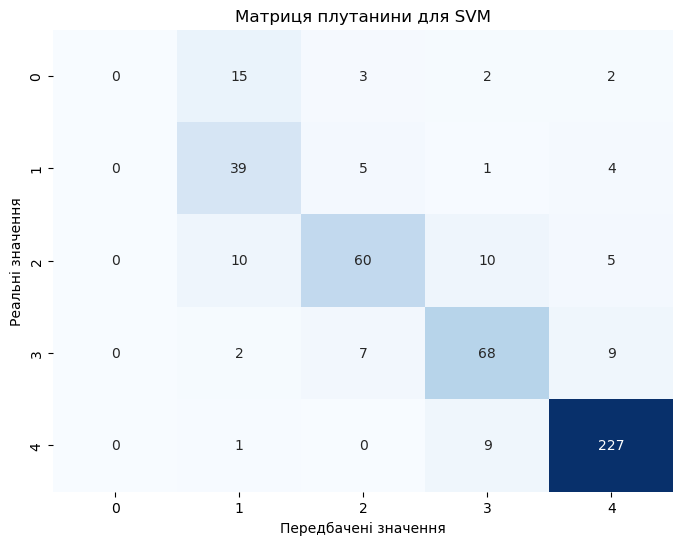

In [55]:
# Матриця плутанини
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Матриця плутанини для SVM")
plt.xlabel("Передбачені значення")
plt.ylabel("Реальні значення")
plt.show()

In [56]:
# Побудова моделі Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [57]:
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.41      0.55        22
         1.0       0.80      0.88      0.83        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479



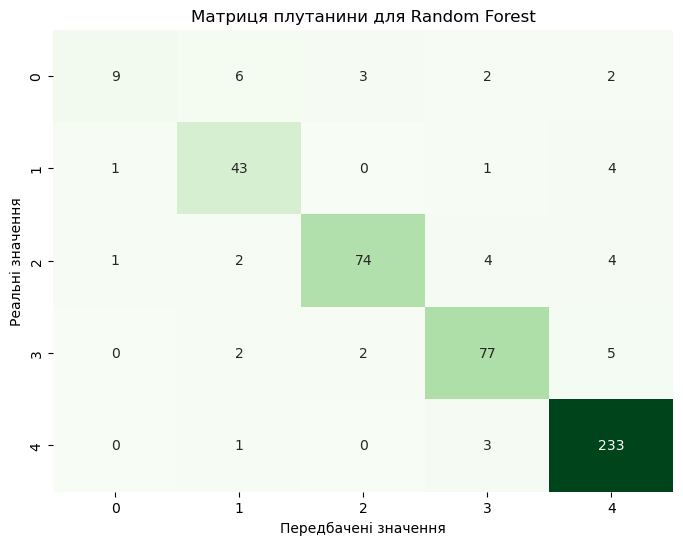

In [58]:
# Обчислення матриці плутанини
cm = confusion_matrix(y_test, y_pred_rf)

# Візуалізація через heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Матриця плутанини для Random Forest")
plt.xlabel("Передбачені значення")
plt.ylabel("Реальні значення")
plt.show()

Спробуємо підвищити точність моделі. Застосуємо логістичну регресію.

In [79]:
from sklearn.linear_model import LogisticRegression

# Створення та навчання моделі
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Прогнозування
y_pred_log_reg = log_reg_model.predict(X_test)

print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred_log_reg),
)
print(
    "Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg)
)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.52      0.67      0.58        49
         2.0       0.68      0.66      0.67        85
         3.0       0.76      0.59      0.67        86
         4.0       0.88      0.99      0.93       237

    accuracy                           0.78       479
   macro avg       0.57      0.58      0.57       479
weighted avg       0.75      0.78      0.76       479

Logistic Regression Confusion Matrix:
 [[  0  15   3   2   2]
 [  0  33  11   1   4]
 [  0  13  56  11   5]
 [  0   2  12  51  21]
 [  0   1   0   2 234]]


/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Спробуємо застосувати градієнтний бустінг

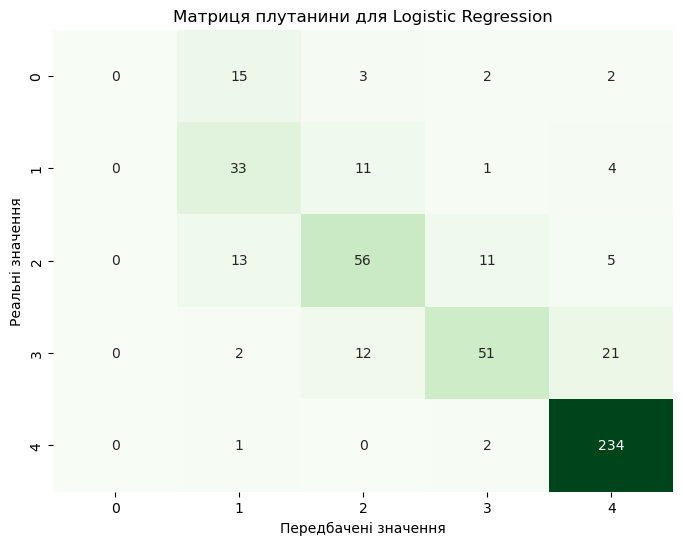

In [80]:
# Обчислення матриці плутанини
cm = confusion_matrix(y_test, y_pred_log_reg)
# Візуалізація через heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Матриця плутанини для Logistic Regression")
plt.xlabel("Передбачені значення")
plt.ylabel("Реальні значення")
plt.show()

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

# Створення та навчання моделі
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогнозування
y_pred_gb = gb_model.predict(X_test)

# Оцінка моделі
print(
    "Gradient Boosting Classification Report:\n",
    classification_report(y_test, y_pred_gb),
)
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        22
         1.0       0.77      0.88      0.82        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.86      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.90       479
   macro avg       0.88      0.83      0.85       479
weighted avg       0.91      0.90      0.90       479

Gradient Boosting Confusion Matrix:
 [[ 13   2   3   2   2]
 [  1  43   0   1   4]
 [  1   3  73   4   4]
 [  0   3   2  74   7]
 [  0   5   0   2 230]]


Спробуємо відібрати ознаки і побудувати моделі.

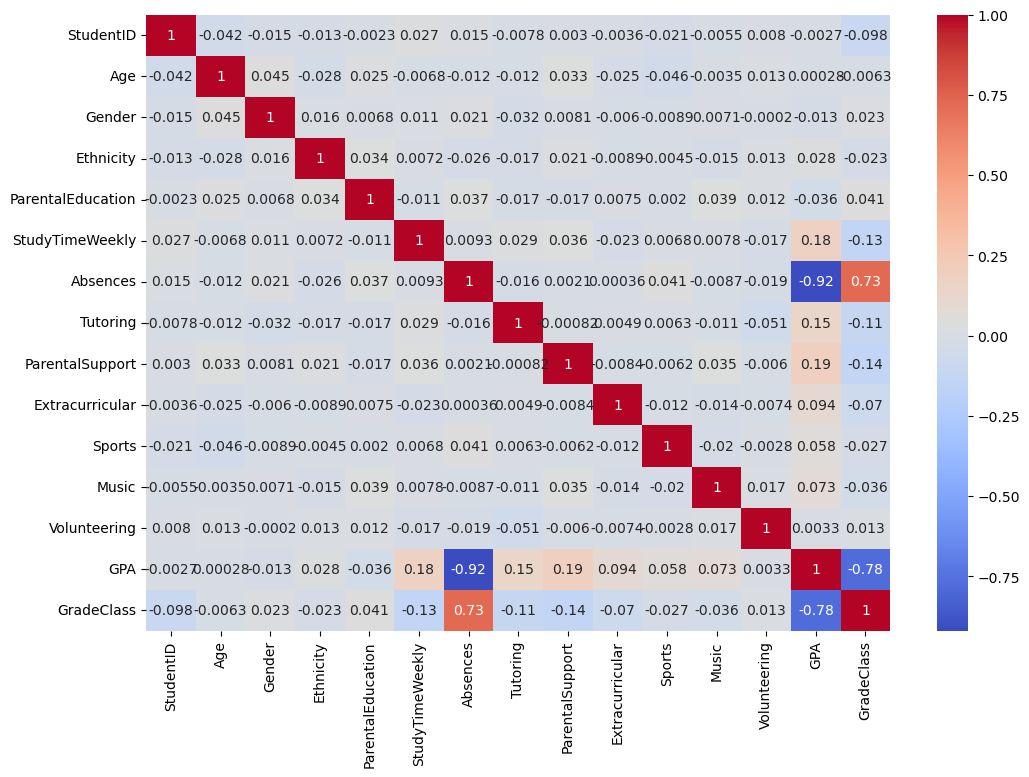

GradeClass           1.000000
GPA                  0.782835
Absences             0.728633
ParentalSupport      0.136823
StudyTimeWeekly      0.134131
Tutoring             0.111695
StudentID            0.098500
Extracurricular      0.069733
ParentalEducation    0.041031
Music                0.036065
Sports               0.026654
Ethnicity            0.023326
Gender               0.022998
Volunteering         0.013156
Age                  0.006250
Name: GradeClass, dtype: float64


In [61]:
# Кореляційна матриця
corr_matrix = df.corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Вибір ознак, що мають високий кореляційний зв'язок з цільовою змінною
target_corr = corr_matrix["GradeClass"].abs().sort_values(ascending=False)
print(target_corr)

На основі кореляційного аналізу, ми оберемо ознаки, які мають найвищий кореляційний зв'язок з цільовою змінною GradeClass. Обираємо топ-5 ознак:

1. GPA
2. Absences
3. ParentalSupport
4. StudyTimeWeekly
5. Tutoring

In [62]:
# Обрані ознаки
selected_features = [
    "GPA",
    "Absences",
    "ParentalSupport",
    "StudyTimeWeekly",
    "Tutoring",
]

# Відокремлення ознак та цільової змінної
X = df[selected_features]
y = df["GradeClass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
# Модель SVM
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.8622129436325678
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.64      0.90      0.75        49
         2.0       0.92      0.80      0.86        85
         3.0       0.83      0.83      0.83        86
         4.0       0.92      0.97      0.94       237

    accuracy                           0.86       479
   macro avg       0.66      0.70      0.67       479
weighted avg       0.83      0.86      0.84       479



/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [64]:
# Модель Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.64      0.74        22
         1.0       0.86      0.86      0.86        49
         2.0       0.94      0.86      0.90        85
         3.0       0.89      0.88      0.89        86
         4.0       0.93      0.99      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.84      0.87       479
weighted avg       0.92      0.92      0.91       479



In [65]:
# Логістична регресія
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred_log_reg),
)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.52      0.67      0.58        49
         2.0       0.68      0.66      0.67        85
         3.0       0.76      0.59      0.67        86
         4.0       0.88      0.99      0.93       237

    accuracy                           0.78       479
   macro avg       0.57      0.58      0.57       479
weighted avg       0.75      0.78      0.76       479



/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sergio/anaconda3/envs/conda_env_example/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [66]:
# Модель Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print(
    "Gradient Boosting Classification Report:\n",
    classification_report(y_test, y_pred_gb),
)

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        22
         1.0       0.86      0.88      0.87        49
         2.0       0.91      0.87      0.89        85
         3.0       0.89      0.87      0.88        86
         4.0       0.93      0.97      0.95       237

    accuracy                           0.91       479
   macro avg       0.88      0.84      0.86       479
weighted avg       0.91      0.91      0.91       479



In [67]:
import numpy as np

random_indices = np.random.choice(len(X_test), size=10, replace=False)

# Отримання відповідних індексів із оригінального DataFrame за індексами тестової вибірки
selected_test_indices = test_indices[random_indices]  # Вибрані індекси

# Отримуємо відповідні StudentID, справжні та прогнозовані значення
student_ids = df.loc[selected_test_indices, "StudentID"]
true_values = y_test.iloc[random_indices]  # Справжні значення
predicted_values = y_pred_rf[random_indices]  # Прогнозовані значення

# Створюємо DataFrame для виведення результатів
df_results = pd.DataFrame(
    {
        "StudentID": student_ids,
        "True_GradeClass": true_values,
        "Predicted_GradeClass": predicted_values,
    }
)

print(df_results)

      StudentID  True_GradeClass  Predicted_GradeClass
1285       2286              1.0                   1.0
368        1369              4.0                   4.0
1449       2450              3.0                   3.0
670        1671              4.0                   4.0
1949       2950              2.0                   2.0
810        1811              4.0                   4.0
765        1766              3.0                   3.0
1770       2771              2.0                   2.0
383        1384              4.0                   4.0
2377       3378              2.0                   2.0


In [68]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [69]:
# Видаляємо стовпці StudentID і GradeClass
df = df.drop(columns=["StudentID", "GradeClass"])

In [70]:
# Масштабуємо ознаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

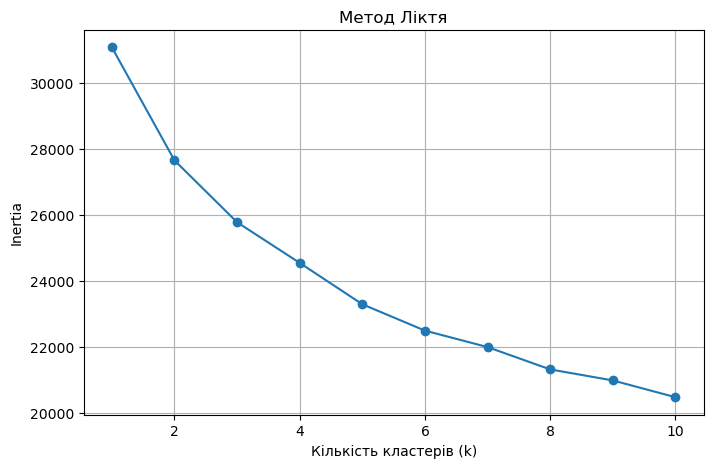

In [71]:
from sklearn.cluster import KMeans

# Метод Ліктя
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.title("Метод Ліктя")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

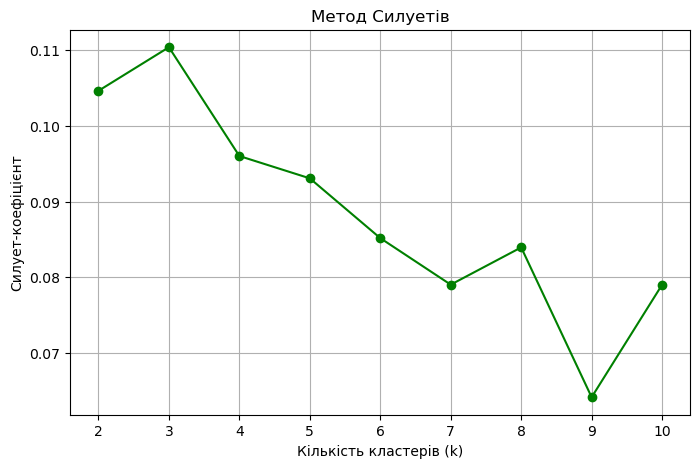

In [72]:
from sklearn.metrics import silhouette_score

#  Метод Силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", color="green")
plt.title("Метод Силуетів")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Силует-коефіцієнт")
plt.grid(True)
plt.show()

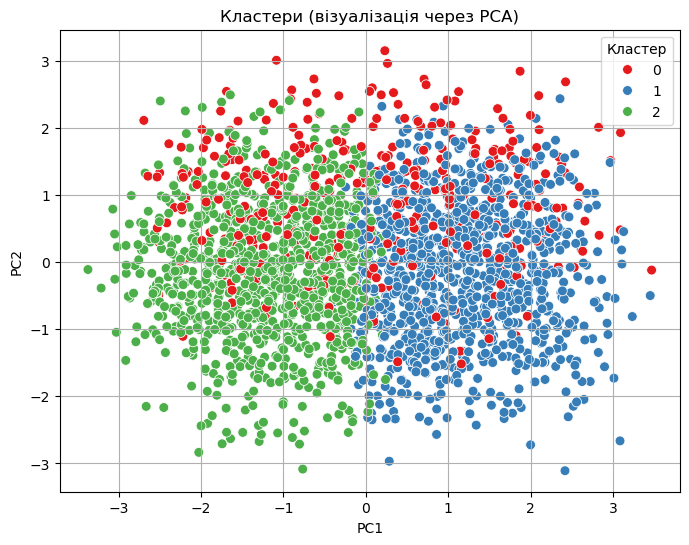

In [73]:
optimal_k = 3

# Створюємо кластеризацію
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Додаємо кластери до даних
df["Cluster"] = cluster_labels

#  Візуалізація кластерів
from sklearn.decomposition import PCA

# Зменшуємо вимірність для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set1", s=50)
plt.title("Кластери (візуалізація через PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Кластер")
plt.grid(True)
plt.show()

In [74]:
# Групування за кластерами і обчислення середніх значень
cluster_summary = df.groupby("Cluster").mean().round(2)

cluster_summary

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
Cluster,,,,,,,,,,,,,
0,16.50,0.51,0.91,1.77,9.55,14.18,0.25,2.11,0.38,0.30,0.21,1.0,1.91
1,16.43,0.49,0.90,1.69,10.15,7.50,0.34,2.22,0.42,0.30,0.20,0.0,2.67
2,16.49,0.53,0.84,1.80,9.48,21.79,0.28,2.02,0.35,0.31,0.19,0.0,1.13


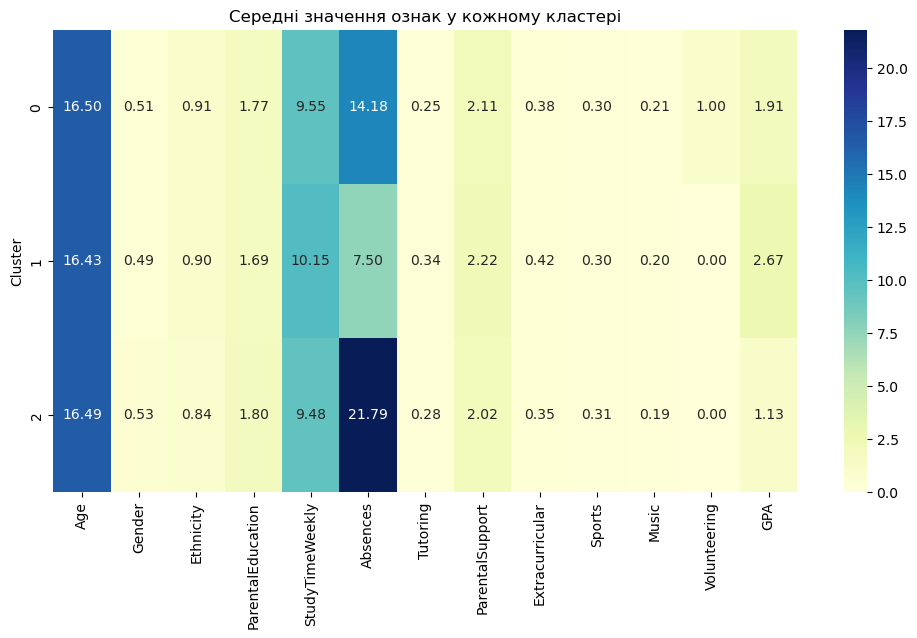

In [75]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Середні значення ознак у кожному кластері")
plt.show()

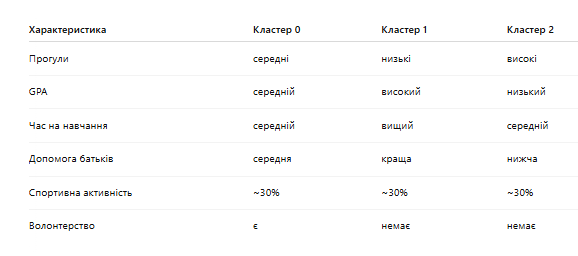